<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/overfitting_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### SOLUTION TO REDUCE OVERFITTING OF A MODEL ###

 1. Reducing network layers or units
 2. Weight Regularization
 3. Dropout
 4. Batch normalization


In [1]:
import tensorflow
from keras import models, layers, initializers
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

In [2]:
# DATASET - Collections of movie reviews classified with bad/good sentiment labels

def vectorize_sequences(sequences, dimension=10000):
  """
  One hot conversion : int to binary matrix
  """
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
partial_x_train = x_train[10000:]
x_val = x_train[:10000]

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
partial_y_train = y_train[10000:]
y_val = y_train[:10000]

### REDUCE UNITS

In [5]:
# MODEL DEFINITION - SOLUTION 1 : Reduce numbers of neurons/layers to prevent overfitting

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 39ms/step - loss: 0.5525 - accuracy: 0.7739 - val_loss: 0.4522 - val_accuracy: 0.8511
Epoch 2/10
30/30 [==============================] - 1s 31ms/step - loss: 0.3760 - accuracy: 0.8933 - val_loss: 0.3589 - val_accuracy: 0.8780
Epoch 3/10
30/30 [==============================] - 1s 34ms/step - loss: 0.2893 - accuracy: 0.9169 - val_loss: 0.3156 - val_accuracy: 0.8859
Epoch 4/10
30/30 [==============================] - 1s 30ms/step - loss: 0.2368 - accuracy: 0.9310 - val_loss: 0.3150 - val_accuracy: 0.8728
Epoch 5/10
30/30 [==============================] - 1s 30ms/step - loss: 0.2012 - accuracy: 0.9401 - val_loss: 0.2828 - val_accuracy: 0.8885
Epoch 6/10
30/30 [==============================] - 1s 33ms/step - loss: 0.1738 - accuracy: 0.9487 - val_loss: 0.2863 - val_accuracy: 0.8844
Epoch 7/10
30/30 [==============================] - 1s 30ms/step - loss: 0.1514 - accuracy: 0.9561 - val_loss: 0.2798 - val_accuracy: 0.8864
Epoch 8/10
30

### REGULARIZATION

In [ ]:
# MODEL DEFINITION - SOLUTION 2 : Add weight regularization to prevent overfitting.

units = 16

model = models.Sequential()
model.add(layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(10000,)))
model.add(layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))

# Different weight regularizers available
# regularizers.l2(0.001)
# regularizers.l1_l2(l1=0.001, l2=0.001)

Epoch 1/10
30/30 [==============================] - 2s 44ms/step - loss: 1.0908 - accuracy: 0.7253 - val_loss: 0.7571 - val_accuracy: 0.8153
Epoch 2/10
30/30 [==============================] - 1s 34ms/step - loss: 0.7074 - accuracy: 0.8269 - val_loss: 0.6807 - val_accuracy: 0.8379
Epoch 3/10
30/30 [==============================] - 1s 34ms/step - loss: 0.6445 - accuracy: 0.8460 - val_loss: 0.6295 - val_accuracy: 0.8518
Epoch 4/10
30/30 [==============================] - 1s 34ms/step - loss: 0.6010 - accuracy: 0.8567 - val_loss: 0.6173 - val_accuracy: 0.8435
Epoch 5/10
30/30 [==============================] - 1s 34ms/step - loss: 0.5786 - accuracy: 0.8602 - val_loss: 0.5950 - val_accuracy: 0.8456
Epoch 6/10
30/30 [==============================] - 1s 35ms/step - loss: 0.5597 - accuracy: 0.8662 - val_loss: 0.5727 - val_accuracy: 0.8570
Epoch 7/10
30/30 [==============================] - 1s 34ms/step - loss: 0.5477 - accuracy: 0.8672 - val_loss: 0.5693 - val_accuracy: 0.8567
Epoch 8/10
30

### DROPOUT

In [ ]:
# MODEL DEFINITION - SOLUTION 3 : Add dropout to prevent overfitting.

units = 16

model = models.Sequential()
model.add(layers.Dense(units, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 42ms/step - loss: 0.6394 - accuracy: 0.6177 - val_loss: 0.5416 - val_accuracy: 0.8414
Epoch 2/10
30/30 [==============================] - 1s 34ms/step - loss: 0.5288 - accuracy: 0.7515 - val_loss: 0.4320 - val_accuracy: 0.8712
Epoch 3/10
30/30 [==============================] - 1s 34ms/step - loss: 0.4472 - accuracy: 0.8083 - val_loss: 0.3515 - val_accuracy: 0.8800
Epoch 4/10
30/30 [==============================] - 1s 35ms/step - loss: 0.3864 - accuracy: 0.8436 - val_loss: 0.3076 - val_accuracy: 0.8852
Epoch 5/10
30/30 [==============================] - 1s 35ms/step - loss: 0.3416 - accuracy: 0.8691 - val_loss: 0.2870 - val_accuracy: 0.8883
Epoch 6/10
30/30 [==============================] - 1s 34ms/step - loss: 0.2979 - accuracy: 0.8955 - val_loss: 0.2738 - val_accuracy: 0.8900
Epoch 7/10
30/30 [==============================] - 1s 34ms/step - loss: 0.2587 - accuracy: 0.9097 - val_loss: 0.2715 - val_accuracy: 0.8898
Epoch 8/10
30

### BATCH NORMALIZATION

In [4]:
# MODEL DEFINITION - SOLUTION 4 : Add batch normalization to prevent overfitting.
# Not so usefull for this specific task

units = 16

model = models.Sequential()

model.add(layers.Dense(units, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units, activation='relu'))
# model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# Some params
# model.add(layers.BatchNormalization(
#            momentum=0.95, 
#            epsilon=0.005,
#            beta_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05), 
#            gamma_initializer=initializers.Constant(value=0.9)))

Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.3797 - accuracy: 0.8499 - val_loss: 0.2800 - val_accuracy: 0.8899
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2071 - accuracy: 0.9198 - val_loss: 0.2792 - val_accuracy: 0.8903
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1546 - accuracy: 0.9434 - val_loss: 0.3058 - val_accuracy: 0.8854
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1178 - accuracy: 0.9591 - val_loss: 0.3458 - val_accuracy: 0.8842
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0873 - accuracy: 0.9687 - val_loss: 0.4483 - val_accuracy: 0.8705
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0623 - accuracy: 0.9787 - val_loss: 0.4750 - val_accuracy: 0.8735
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0425 - accuracy: 0.9857 - val_loss: 0.5607 - val_accuracy: 0.8698
Epoch

### RESULTS

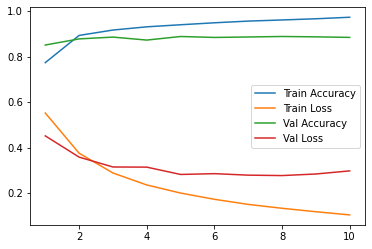

In [6]:
# LOG TRAINING RESULTS

history_dict = history.history
loss = history_dict['loss']
acc = history_dict['accuracy']
val_loss = history_dict["val_loss"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, 11)

plt.plot(epochs, acc, label="Train Accuracy")
plt.plot(epochs, loss, label="Train Loss")
plt.plot(epochs, val_acc, label="Val Accuracy")
plt.plot(epochs, val_loss, label="Val Loss")
plt.legend()
plt.show()

In [7]:
# EVALUATION

score = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(score)

782/782 [==============================] - 2s 2ms/step - loss: 0.3179 - accuracy: 0.8752
['loss', 'accuracy']
[0.3178602457046509, 0.8751599788665771]
